### Problem Statement

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Target 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

### Impoting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Laoding the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

Dataset conatins 907 rows and 27 columns

In [4]:
df.columns  #columns name in the dataset

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.head()   #first five rows of the dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.tail()  #last five rows of the datatset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the null values

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are cloumns having more than 50% missing values so we can drop them

#### Dropping the columns

In [8]:
df.drop(['country','country_long','gppd_idnr','other_fuel2','other_fuel2','other_fuel3','url','wepp_id','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [9]:
df.shape   #dropped the 10 columns

(907, 17)

In [10]:
df['latitude'].mean()

21.19791811846691

In [20]:
df['generation_data_source'].mode()

0    Central Electricity Authority
dtype: object

#### Dealing with the null values

In [23]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['other_fuel1']=df['other_fuel1'].fillna('Oil')
df['commissioning_year']=df['commissioning_year'].fillna(2015.0)
df['owner']=df['owner'].fillna('Acc Acc ltd')
df['geolocation_source']=df['geolocation_source'].fillna('WRI')
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(2019.0)
df['generation_data_source']=df['generation_data_source'].fillna('Central Electricity Authority')

In [25]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [26]:
df.isnull().sum()

name                      0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Hence there is no null values

In [27]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2015.0,AES,CDM,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


#### Univariate Analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

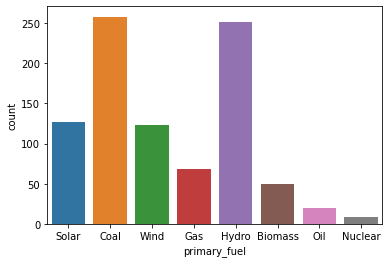

In [29]:
sns.countplot(df['primary_fuel'])

Most of power plants have their primary fuel as Coal

<AxesSubplot:xlabel='latitude', ylabel='Density'>

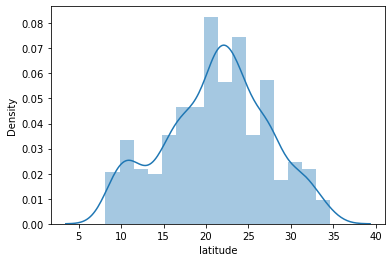

In [33]:
sns.distplot(df['latitude'])

Most of the powerplants lies in the lattitude range of 20-25 degree

<AxesSubplot:xlabel='longitude', ylabel='Density'>

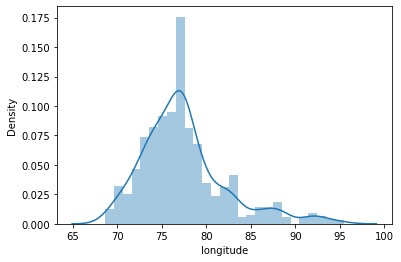

In [34]:
sns.distplot(df['longitude'])

Most of the power plants lie in 70 to 80 degree range

#### Bivariate Analysis

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

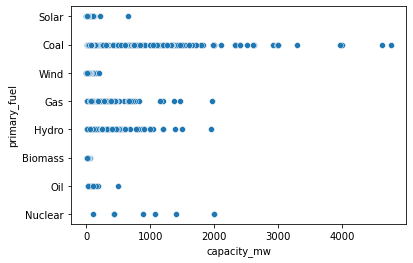

In [28]:
sns.scatterplot(df['capacity_mw'],df['primary_fuel'])

Coal based power plants have the higher capacity compare to others

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

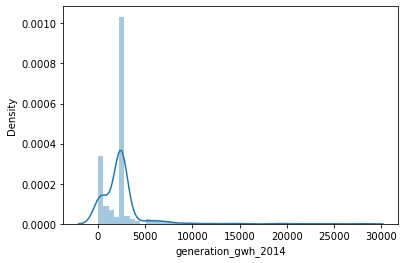

In [42]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

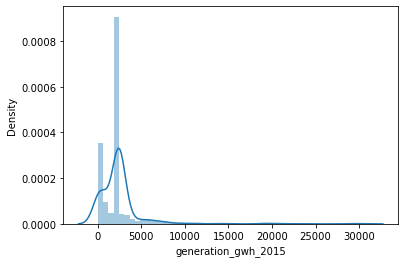

In [43]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

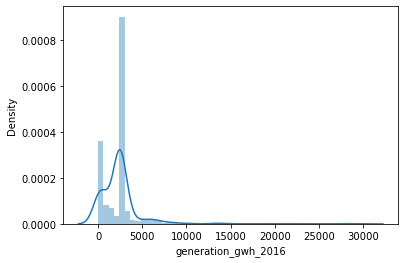

In [44]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

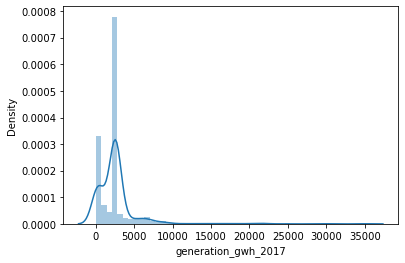

In [45]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

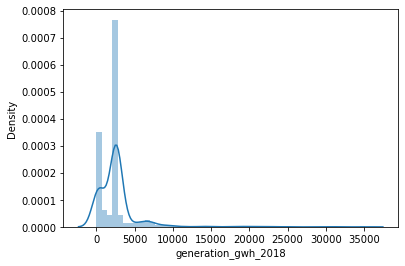

In [46]:
sns.distplot(df['generation_gwh_2018'])

In all those above years the generation of plower plants is up to 10000

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

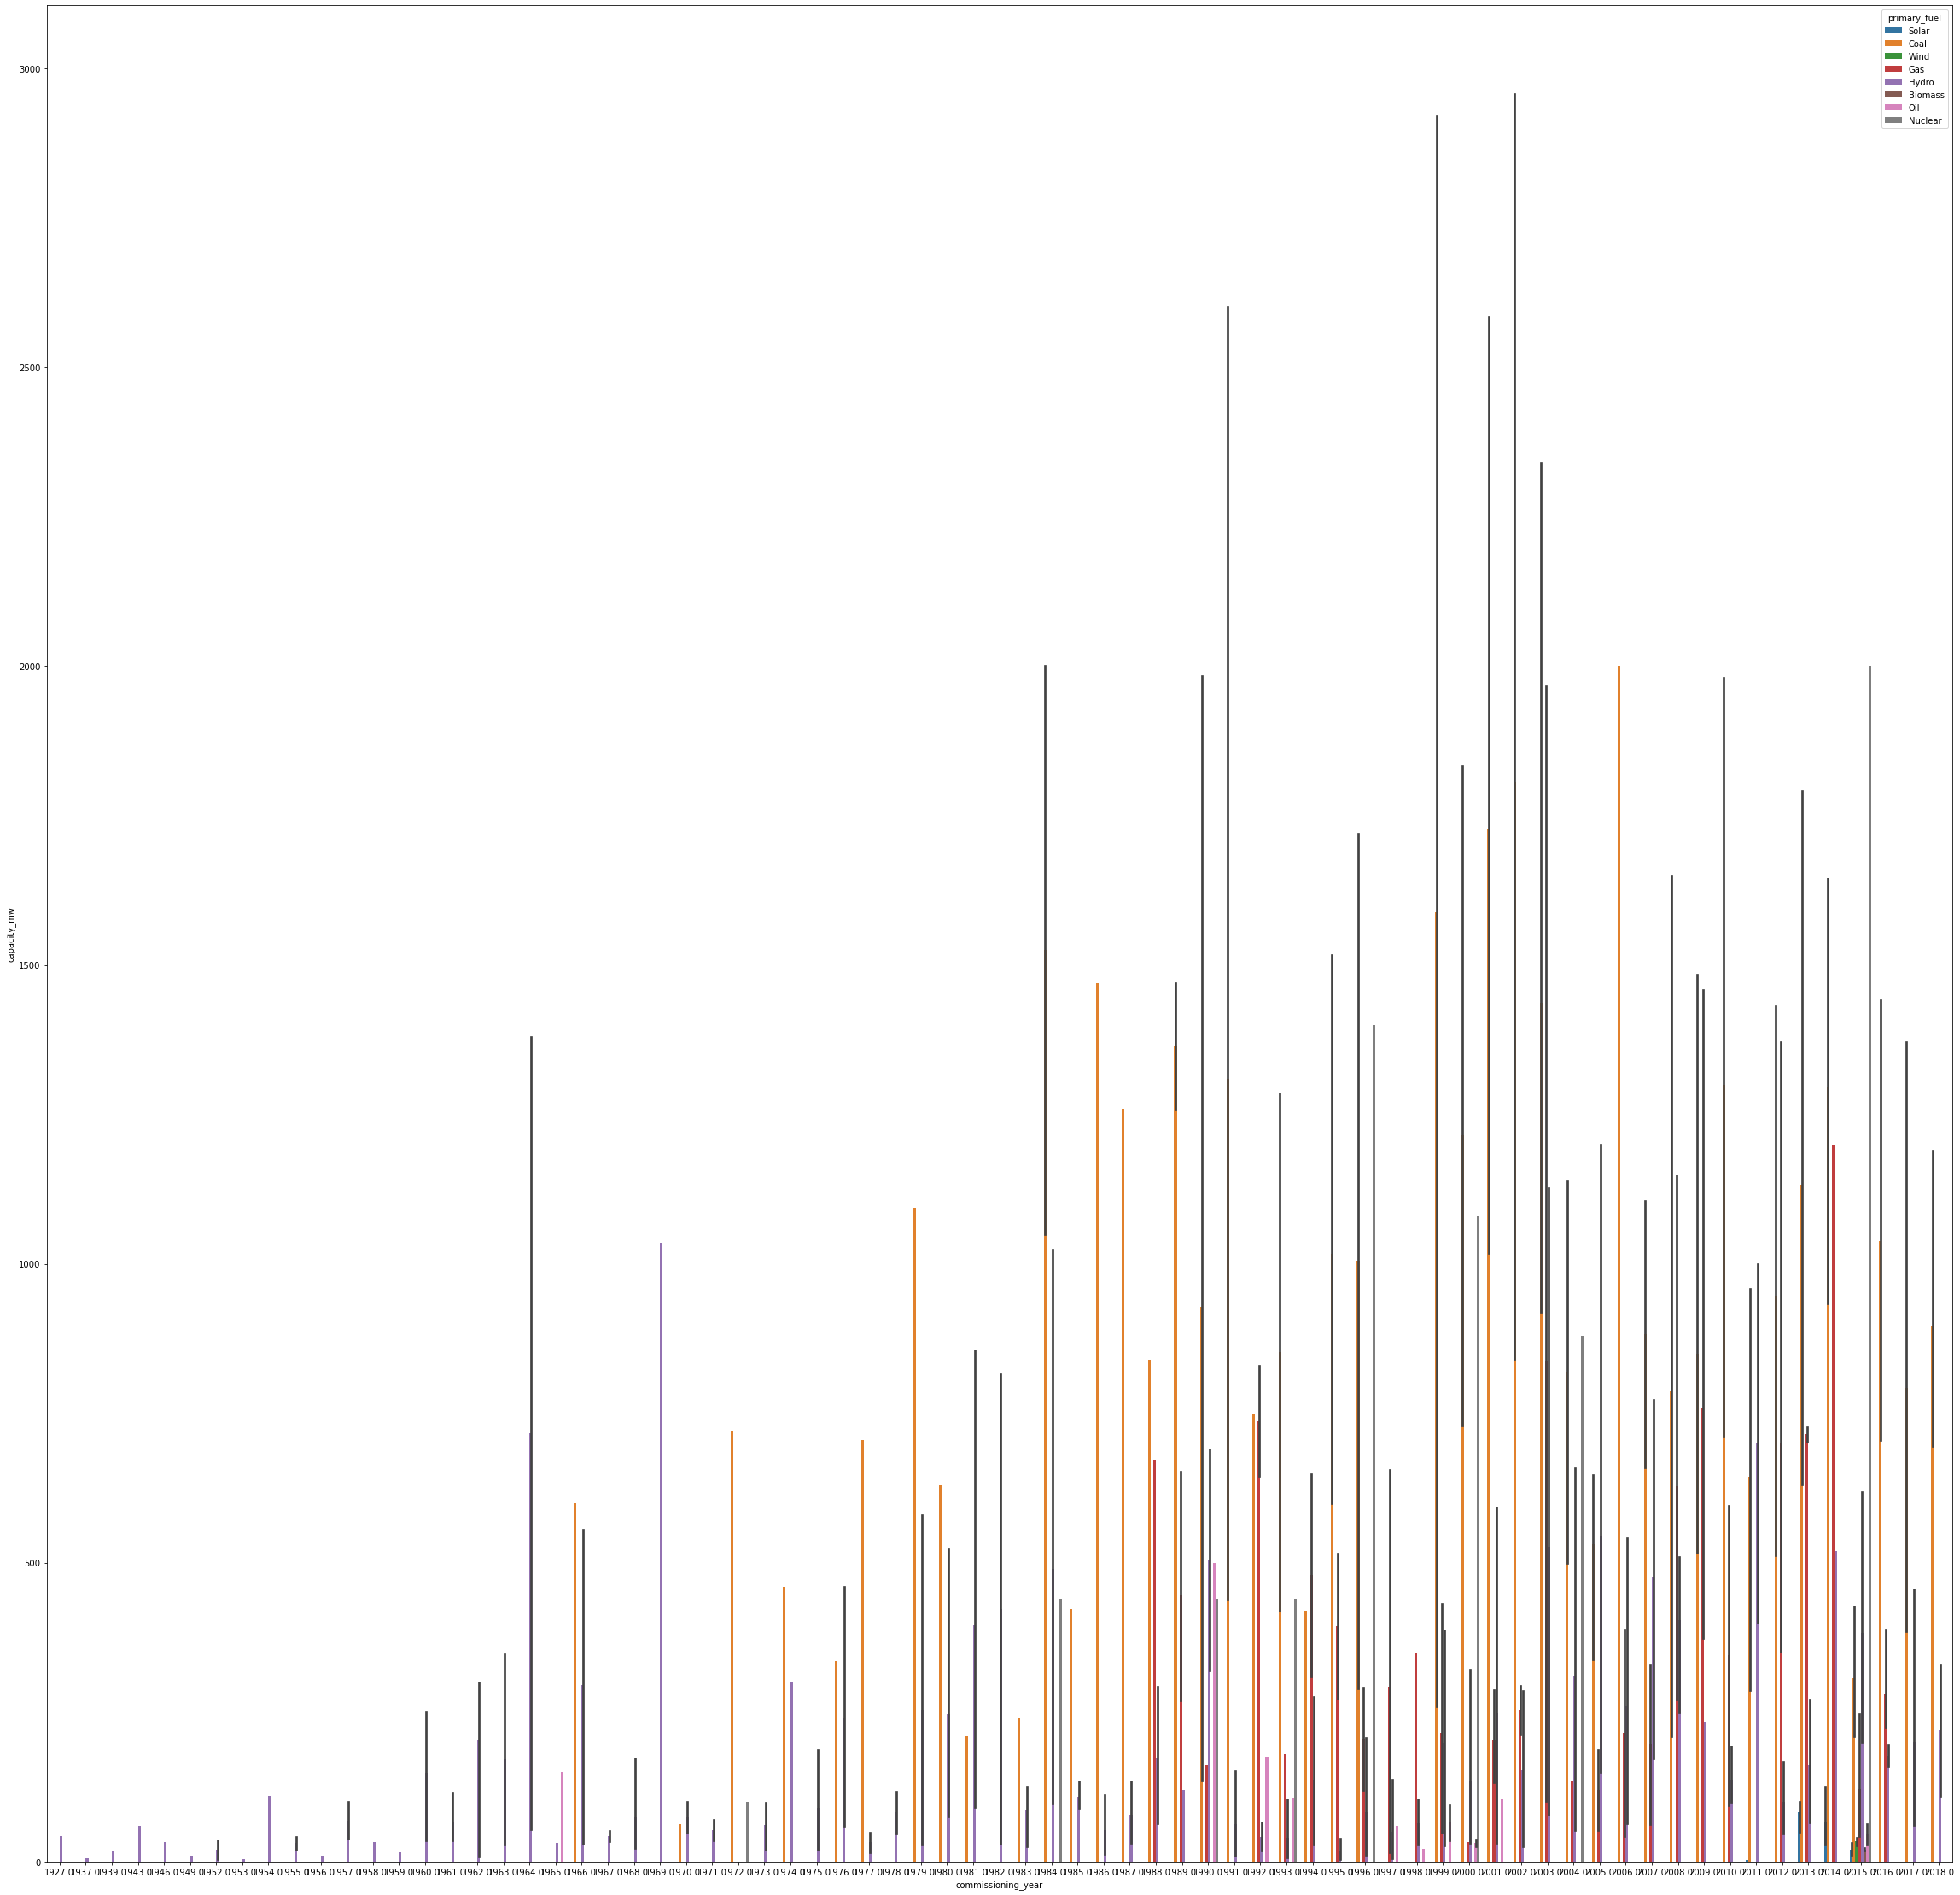

In [32]:
plt.figure(figsize=(40,40))
sns.barplot(df['commissioning_year'],df['capacity_mw'],hue=df['primary_fuel'])

In around 2003 more power plants have been installed.

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

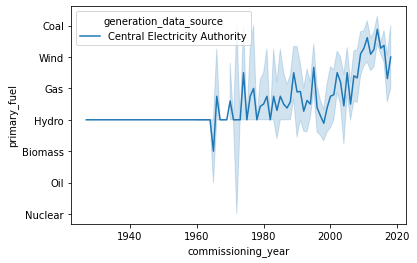

In [40]:
sns.lineplot(df['commissioning_year'],df['primary_fuel'],hue=df['generation_data_source'])

In past years we have only hydro plants and with the time changes we hav changed the primary fuels to coal, wind & gas

#### Multivariate Analysis

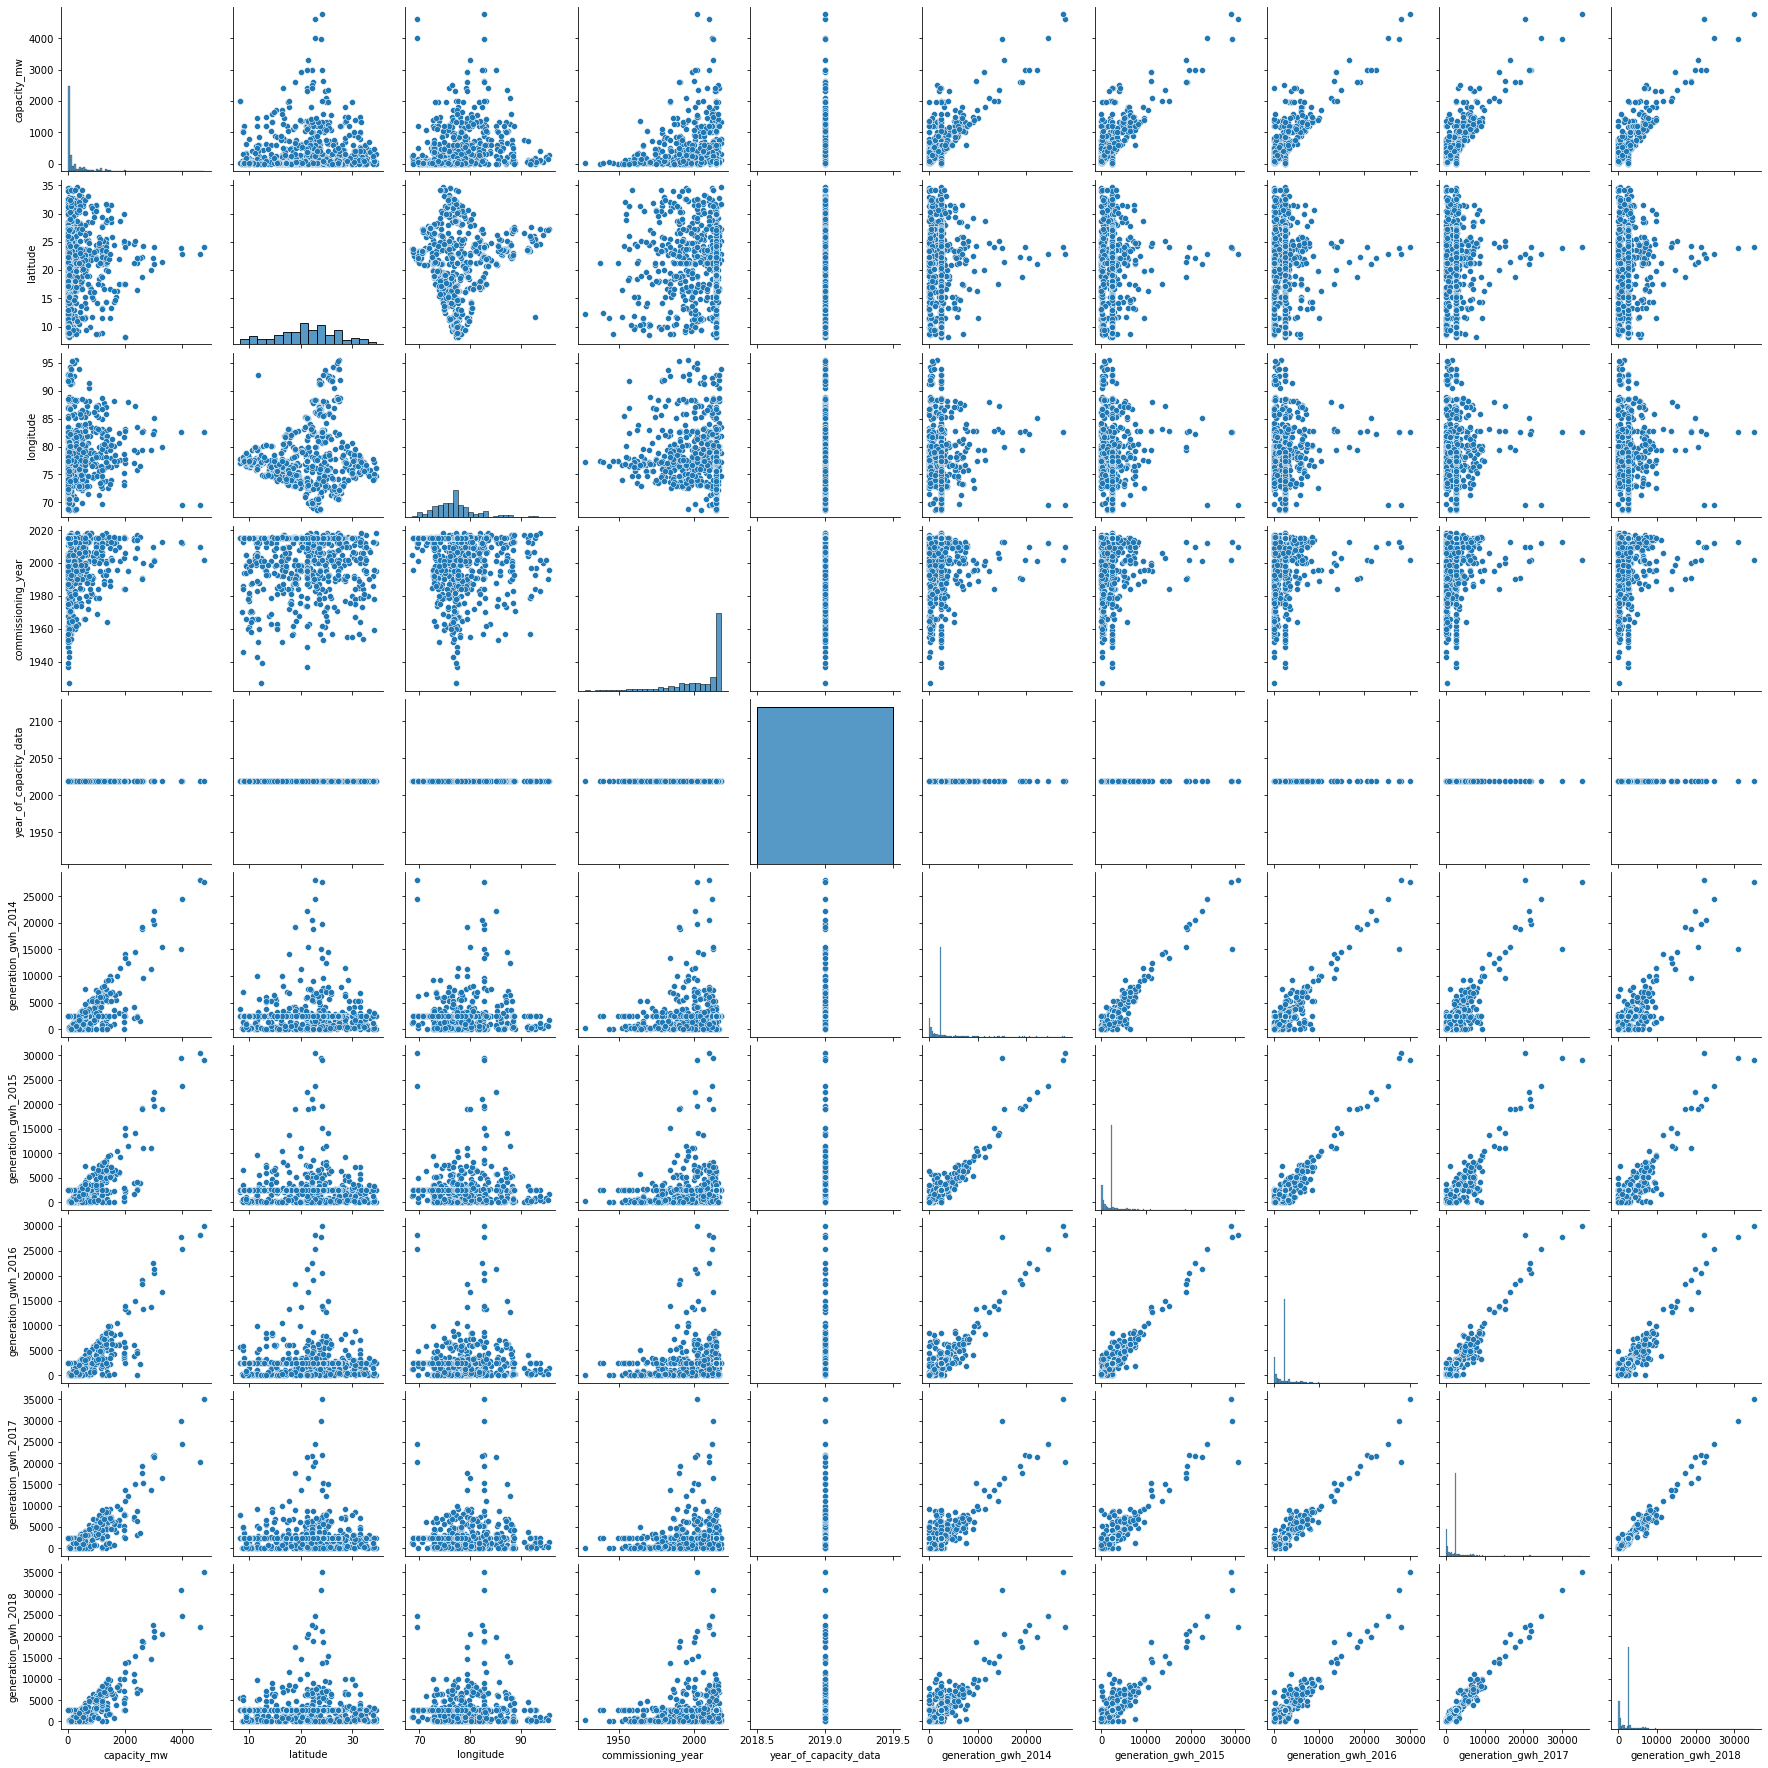

In [41]:
sns.pairplot(df)

### Label Encoder

In [49]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

list1=['primary_fuel','other_fuel1','owner','source','geolocation_source','generation_data_source','name']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
    
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,2.5,28.1839,73.2407,6,2,2011.0,145,12,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,1,98.0,24.7663,74.6090,1,2,2015.0,177,84,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,2,39.2,21.9038,69.3732,7,2,2015.0,112,105,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,3,135.0,23.8712,91.3602,2,2,2004.0,225,106,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1800.0,21.9603,82.4091,1,2,2015.0,225,106,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


### Statistical Summary

In [50]:
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,453.000000,326.223755,21.197918,77.464907,3.206174,1.995590,2004.594267,192.489526,102.296582,1.733186,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,261.972645,590.085456,6.079148,4.812291,2.280652,0.081259,15.734928,64.804653,31.785033,0.677151,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.500000,16.725000,17.072000,74.388900,1.000000,2.000000,1998.000000,181.500000,105.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,453.000000,59.200000,21.281800,76.979200,3.000000,2.000000,2014.000000,225.000000,106.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2015.000000,225.000000,106.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


- very karge difference in the 75% and max in the capacity_mw column
- total count is 907 rows
- skewness is present
- outilers are present in the generation of different years

### Correlation

In [51]:
corr=df.corr()
corr

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
name,1.000000,0.060240,-0.135247,0.020279,0.040753,-0.074663,-0.041465,-3.250630e-02,-6.731190e-02,3.622452e-02,NaN,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,NaN
capacity_mw,0.060240,1.000000,0.050984,0.195882,-0.380395,0.003105,-0.004072,2.538489e-01,6.691227e-02,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,-0.135247,0.050984,1.000000,0.036362,-0.010204,0.036695,0.034519,4.525157e-02,-1.797696e-02,-1.842751e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,NaN
longitude,0.020279,0.195882,0.036362,1.000000,-0.347948,0.030311,-0.159025,2.254413e-01,5.335602e-02,2.523426e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,NaN
primary_fuel,0.040753,-0.380395,-0.010204,-0.347948,1.000000,0.004912,0.164947,-2.167937e-01,-6.692594e-02,-4.832168e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,-0.074663,0.003105,0.036695,0.030311,0.004912,1.000000,0.056437,-2.725692e-02,-6.330524e-03,-2.140831e-02,NaN,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,NaN
commissioning_year,-0.041465,-0.004072,0.034519,-0.159025,0.164947,0.056437,1.000000,-3.306245e-01,-7.444093e-02,-2.599290e-01,NaN,1.100630e-01,1.218816e-01,1.411613e-01,1.413426e-01,1.442491e-01,NaN
owner,-0.032506,0.253849,0.045252,0.225441,-0.216794,-0.027257,-0.330625,1.000000e+00,1.162415e-01,3.124302e-01,NaN,9.461264e-17,1.147842e-16,1.706067e-16,1.781760e-16,7.421197e-17,NaN
source,-0.067312,0.066912,-0.017977,0.053356,-0.066926,-0.006331,-0.074441,1.162415e-01,1.000000e+00,1.260392e-01,NaN,2.219538e-17,9.724708e-18,-6.694297e-18,-7.140546e-18,-4.132792e-17,NaN
geolocation_source,0.036225,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.259929,3.124302e-01,1.260392e-01,1.000000e+00,NaN,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17,NaN


<AxesSubplot:>

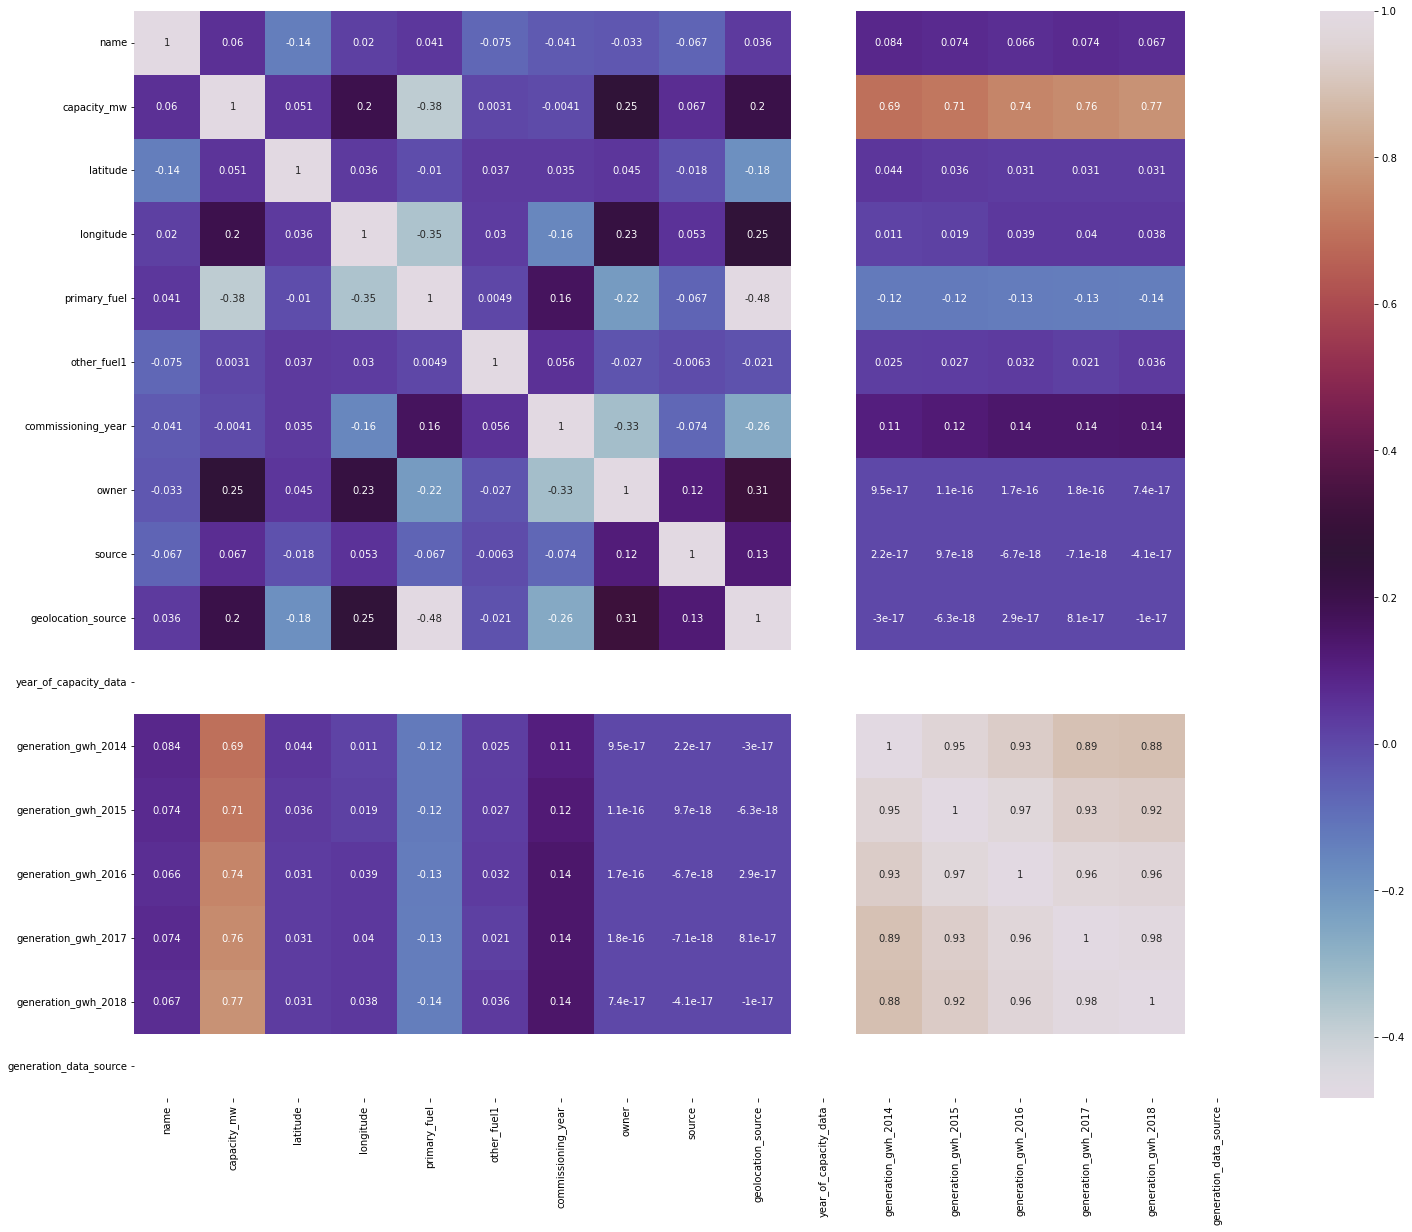

In [52]:
plt.figure(figsize=(25,20))  #plotting the correlation using heatmap
sns.heatmap(corr,annot=True,cmap='twilight')

In [53]:
corr['primary_fuel'].sort_values()  #correlation of other columns with the primary fuel

geolocation_source       -0.483217
capacity_mw              -0.380395
longitude                -0.347948
owner                    -0.216794
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
source                   -0.066926
latitude                 -0.010204
other_fuel1               0.004912
name                      0.040753
commissioning_year        0.164947
primary_fuel              1.000000
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

most of the columns are negatively correlated

In [55]:
corr['capacity_mw'].sort_values()  #correlation of other columns with capacity_mw column

primary_fuel             -0.380395
commissioning_year       -0.004072
other_fuel1               0.003105
latitude                  0.050984
name                      0.060240
source                    0.066912
longitude                 0.195882
geolocation_source        0.204865
owner                     0.253849
generation_gwh_2014       0.694350
generation_gwh_2015       0.711190
generation_gwh_2016       0.742221
generation_gwh_2017       0.757585
generation_gwh_2018       0.773456
capacity_mw               1.000000
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

Most of the columns are positively correlated

In [54]:
df.drop(['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)  #dropping the columns as they have no correlation
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,145,12,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,24.7663,74.6090,1,2,2015.0,177,84,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,21.9038,69.3732,7,2,2015.0,112,105,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,23.8712,91.3602,2,2,2004.0,225,106,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,21.9603,82.4091,1,2,2015.0,225,106,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

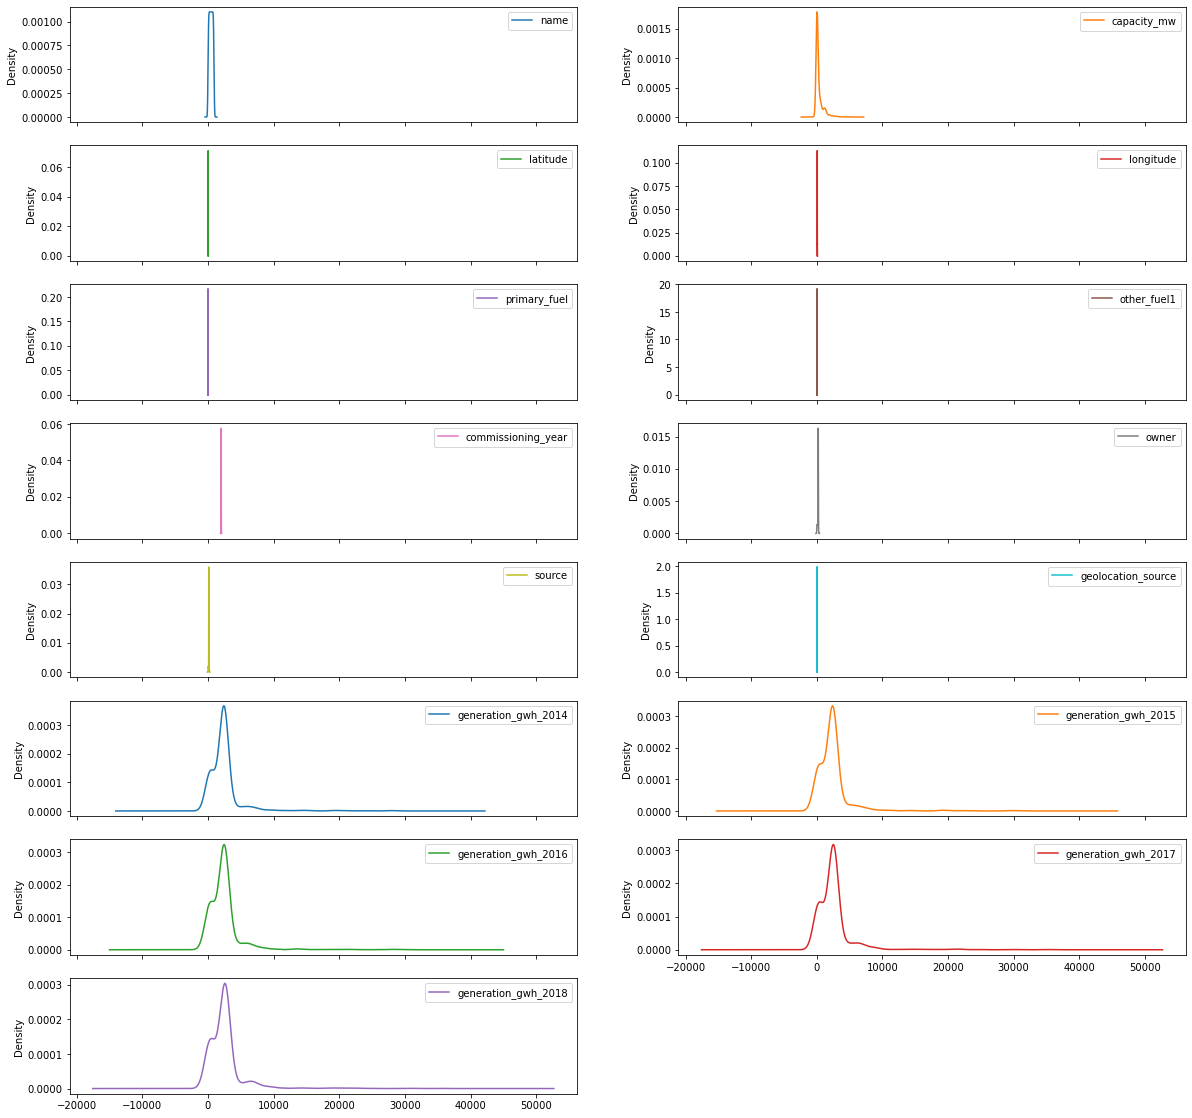

In [57]:
df.plot(kind='kde',subplots=True,layout=(8,2),figsize=(20,20))

Very less skewness present in the dataset

### Plotting the outliers

name                      AxesSubplot(0.125,0.799681;0.352273x0.0803191)
capacity_mw            AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
latitude                  AxesSubplot(0.125,0.703298;0.352273x0.0803191)
longitude              AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
primary_fuel              AxesSubplot(0.125,0.606915;0.352273x0.0803191)
other_fuel1            AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
commissioning_year        AxesSubplot(0.125,0.510532;0.352273x0.0803191)
owner                  AxesSubplot(0.547727,0.510532;0.352273x0.0803191)
source                    AxesSubplot(0.125,0.414149;0.352273x0.0803191)
geolocation_source     AxesSubplot(0.547727,0.414149;0.352273x0.0803191)
generation_gwh_2014       AxesSubplot(0.125,0.317766;0.352273x0.0803191)
generation_gwh_2015    AxesSubplot(0.547727,0.317766;0.352273x0.0803191)
generation_gwh_2016       AxesSubplot(0.125,0.221383;0.352273x0.0803191)
generation_gwh_2017    AxesSubplot(0.547727,0.22138

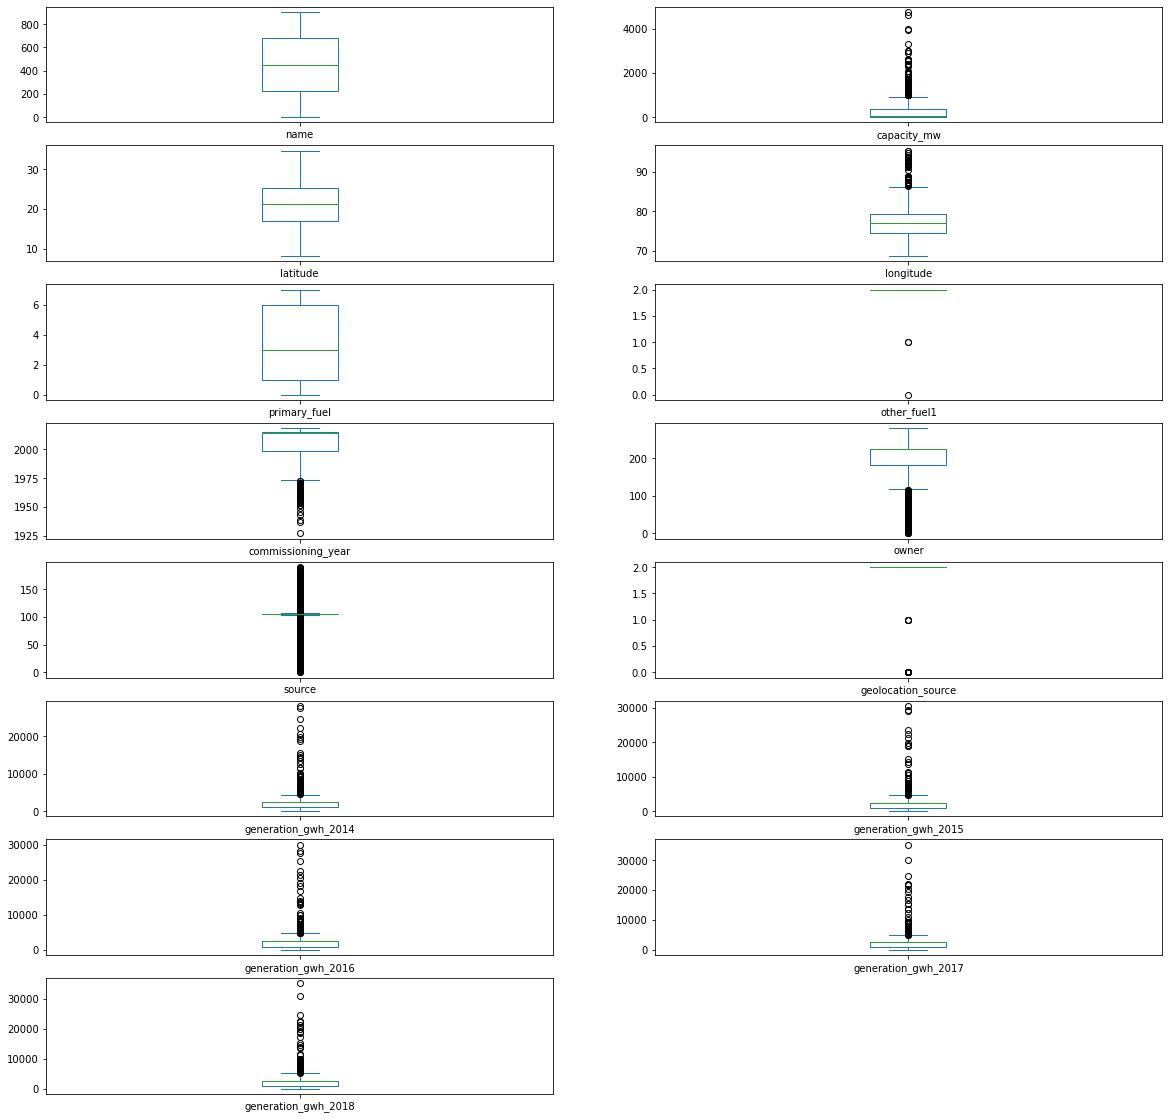

In [58]:
df.plot(kind='box',subplots=True,layout=(8,2),figsize=(20,20))

#### Checking the skewness

In [47]:
df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.141881
commissioning_year      -1.714873
year_of_capacity_data    0.000000
generation_gwh_2014      5.035446
generation_gwh_2015      5.364134
generation_gwh_2016      5.068427
generation_gwh_2017      5.110952
generation_gwh_2018      4.937907
dtype: float64

#### Hanling the outliers

In [59]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([ 15,  15,  15,  15,  15,  20, 119, 143, 143, 143, 143, 143, 143,
       147, 158, 176, 179, 183, 209, 209, 209, 209, 209, 209, 222, 244,
       308, 308, 308, 308, 308, 308, 323, 333, 340, 342, 360, 363, 364,
       364, 364, 364, 364, 364, 371, 375, 404, 416, 427, 444, 454, 478,
       482, 484, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 499, 519, 538, 541, 546, 573, 577, 583, 601, 621, 638, 648,
       648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695,
       695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 724, 724, 724,
       724, 724, 726, 726, 726, 726, 726, 726, 728, 767, 769, 771, 786,
       786, 786, 786, 786, 786, 788, 807, 808, 808, 808, 808, 808, 808,
       811, 813, 817, 818, 835, 847, 848, 880, 880, 880, 880, 880, 880,
       894], dtype=int64), array([ 1, 11, 12, 13, 14,  8,  8,  1, 10, 11, 12, 13, 14,  1, 10,  8,  3,
        3,  1, 10, 11, 12, 13, 14,  6,  3,  1, 10, 11, 12, 13, 14,  3,  3,
        3,  6,  3,  1,  1, 10,

(839, 15)

In [60]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.0,145,12,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,24.7663,74.6090,1,2,2015.0,177,84,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,21.9038,69.3732,7,2,2015.0,112,105,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,23.8712,91.3602,2,2,2004.0,225,106,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,21.9603,82.4091,1,2,2015.0,225,106,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,77.3568,1,2,2016.0,225,106,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903,3.0,12.8932,78.1654,6,2,2015.0,18,166,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904,25.5,15.2758,75.5811,7,2,2015.0,225,105,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905,80.0,24.3500,73.7477,1,2,2015.0,271,146,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [61]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

### 1. Primary fuel prediction

In [64]:
df=df[['name', 'capacity_mw', 'latitude', 'longitude',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','primary_fuel']]

### Model Building

In [65]:
# dividing the columns for machine learning

#independent column
x=df.iloc[:,:-1]
#target value
y=df.iloc[:,-1]

#### Importing the different classification models

In [66]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [67]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

#### Finding the best random state

In [69]:
model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.5436507936507936 on random state 55


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=.30)

#### Logistic Regression

In [71]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.5436507936507936
Confusion Matrix:  
 [[ 0  1  0  1  0  0  7  3]
 [ 0 36  2 13  0  0  3  4]
 [ 0  2  3  7  0  2  3  0]
 [ 0  7  0 46  0  0  7 10]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  2  0  1  0  1]
 [ 0  4  0  2  0  0 29  8]
 [ 0  0  0 10  0  0 14 22]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.62      0.65        58
           2       0.60      0.18      0.27        17
           3       0.57      0.66      0.61        70
           4       0.00      0.00      0.00         1
           5       0.33      0.20      0.25         5
           6       0.46      0.67      0.55        43
           7       0.46      0.48      0.47        46

    accuracy                           0.54       252
   macro avg       0.39      0.35      0.35       252
weighted avg       0.53      0.54      0.52       252



#### Decision Tree classifier

In [72]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.7777777777777778
Confusion Matrix:  
 [[ 5  7  0  0  0  0  0  0]
 [ 2 39  3  7  4  2  1  0]
 [ 0  5  4  4  1  3  0  0]
 [ 0  3  7 58  2  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  1  1  0  2  0  0]
 [ 0  1  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 46]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.68      0.67      0.68        58
           2       0.27      0.24      0.25        17
           3       0.83      0.83      0.83        70
           4       0.00      0.00      0.00         1
           5       0.29      0.40      0.33         5
           6       0.98      0.98      0.98        43
           7       1.00      1.00      1.00        46

    accuracy                           0.78       252
   macro avg       0.59      0.57      0.57       252
weighted avg       0.79      0.78      0.78       252



#### Support vector classifier

In [73]:
svc.fit(x_train,y_train)
pred3=svc.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.5079365079365079
Confusion Matrix:  
 [[ 0  0  0  0  0  0  6  6]
 [ 0 31  0 12  0  0  8  7]
 [ 0  1  0 13  0  0  1  2]
 [ 0  8  0 45  0  0  8  9]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  2  0]
 [ 0  0  0  0  0  0 29 14]
 [ 0  0  0  0  0  0 23 23]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      0.53      0.63        58
           2       0.00      0.00      0.00        17
           3       0.62      0.64      0.63        70
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.38      0.67      0.48        43
           7       0.38      0.50      0.43        46

    accuracy                           0.51       252
   macro avg       0.27      0.29      0.27       252
weighted avg       0.48      0.51      0.48       252



#### Random forest classifier

In [74]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.873015873015873
Confusion Matrix:  
 [[ 8  4  0  0  0  0  0  0]
 [ 1 48  3  6  0  0  0  0]
 [ 0  3  8  3  0  3  0  0]
 [ 0  4  0 66  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  1  1  0  2  0  0]
 [ 0  1  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 46]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.83      0.80        58
           2       0.67      0.47      0.55        17
           3       0.87      0.94      0.90        70
           4       0.00      0.00      0.00         1
           5       0.40      0.40      0.40         5
           6       1.00      0.98      0.99        43
           7       1.00      1.00      1.00        46

    accuracy                           0.87       252
   macro avg       0.70      0.66      0.68       252
weighted avg       0.87      0.87      0.87       252



#### KNeighboe classifier

In [75]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.5912698412698413
Confusion Matrix:  
 [[ 2  3  1  1  0  0  4  1]
 [ 2 39  2 11  0  0  1  3]
 [ 0  3  2  7  0  3  1  1]
 [ 1  6  0 63  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  2  2  0  0  0  0]
 [ 9  7  0  3  0  0 17  7]
 [ 0  4  0 12  0  0  4 26]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.14      0.17      0.15        12
           1       0.61      0.67      0.64        58
           2       0.29      0.12      0.17        17
           3       0.64      0.90      0.75        70
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.63      0.40      0.49        43
           7       0.68      0.57      0.62        46

    accuracy                           0.59       252
   macro avg       0.37      0.35      0.35       252
weighted avg       0.58      0.59      0.57       252



#### Gaussian NB classifier

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred6=gnb.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred6))
print('Classification Report: ','\n',classification_report(y_test,pred6))

Accuracy Score:  0.6904761904761905
Confusion Matrix:  
 [[11  0  0  0  0  0  1  0]
 [ 8  4  0 23 17  0  6  0]
 [ 3  0  0 14  0  0  0  0]
 [ 0  0  0 69  1  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  4  0  0  1  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 46]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.50      0.92      0.65        12
           1       1.00      0.07      0.13        58
           2       0.00      0.00      0.00        17
           3       0.63      0.99      0.77        70
           4       0.05      1.00      0.10         1
           5       0.00      0.00      0.00         5
           6       0.84      1.00      0.91        43
           7       1.00      1.00      1.00        46

    accuracy                           0.69       252
   macro avg       0.50      0.62      0.44       252
weighted avg       0.75      0.69      0.61       252



#### Cross val score

In [77]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  84.02543096091483
at cv=  4
cross val score =  83.91148325358851
at cv=  5
cross val score =  84.6264613629883
at cv=  6
cross val score =  85.1036313806098


#### Hypermetr Tuning

In [78]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['gini','entropy'],
      'max_features':['sqrt','log2','auto'],
      'max_depth':[2,3,4,5]}

GCV=GridSearchCV(rdc,param,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}

In [79]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8333333333333334

The model accuracy is 83% which is good

### Saving the model

In [80]:
import pickle
filename='fuel_power.pkl'
pickle.dump(lg, open(filename,'wb'))

### Conclusion

In [82]:
a=np.array(y_test)
pred=np.array(GCV_pred)
Fuel_power=pd.DataFrame({'Actual':a,'Predicted':pred})
Fuel_power

,Actual,Predicted
0,1,1
1,0,0
2,3,3
3,6,6
4,6,6
...,...,...
247,6,6
248,3,3
249,7,7
250,1,1


### 2. Capacity_mw prediction

In [83]:
df=df[['name', 'latitude', 'longitude',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','primary_fuel','capacity_mw']]

In [84]:
# dividing the columns for machine learning

#independent column
x=df.iloc[:,:-1]
#target value
y=df.iloc[:,-1]

#### Model Building

In [85]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [86]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

#### Finding the best random state

In [87]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.572511275523782 on random state 43


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=.30)

#### Linear Regression

In [89]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.572511275523782


#### Decsion tree regressor

In [90]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.49151041714424515


#### Support vector regressor

In [91]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  -0.22543867369344794


#### KNeighbor regressor

In [92]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.769136515199478


#### Random forest regressor

In [93]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7317113350762708


#### Lasso regularization

In [94]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred6=ls.predict(x_test)
acc=r2_score(y_test,pred6)
print('Accuracy Score: ',acc)

Accuracy Score:  0.5725114323170353


#### Cross val score

In [95]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(knr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  73.48659714508514
at cv=  4
cross val score =  72.3878405419414
at cv=  5
cross val score =  73.67566151407834
at cv=  6
cross val score =  74.02057076057825


#### Hypermeter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}

GCV=GridSearchCV(knr,para,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'algorithm': 'auto', 'weights': 'uniform'}

In [97]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.769136515199478

The model accuracy is 76.9% 

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5,pred6]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  206.93526615177285
mean squared error:  88695.28899638806
root mean squared error:  297.81754313066926


error:
mean absolute error:  166.0604761904762
mean squared error:  105501.33353412698
root mean squared error:  324.8096881777497


error:
mean absolute error:  270.51082716025525
mean squared error:  254253.81089001687
root mean squared error:  504.2358683096799


error:
mean absolute error:  120.73513492063489
mean squared error:  47899.51718184952
root mean squared error:  218.8595832533945


error:
mean absolute error:  123.64850337301586
mean squared error:  55664.487289159115
root mean squared error:  235.93322633567132


error:
mean absolute error:  206.9351070699207
mean squared error:  88695.25646495013
root mean squared error:  297.81748851427466




KNeighbor Regressor has the least error

### Saving the model

In [99]:
import pickle
filename='capacity_power.pkl'
pickle.dump(lg, open(filename,'wb'))

### Conclusion

In [100]:
a=np.array(y_test)
pred=np.array(GCV_pred)
Capacity=pd.DataFrame({'Actual':a,'Predicted':pred})
Capacity

,Actual,Predicted
0,23.10,38.73
1,11.20,42.06
2,1.00,55.50
3,50.00,14.90
4,1330.00,1104.00
...,...,...
247,21.00,102.34
248,1050.00,1326.00
249,34.65,72.84
250,1200.00,1090.82
